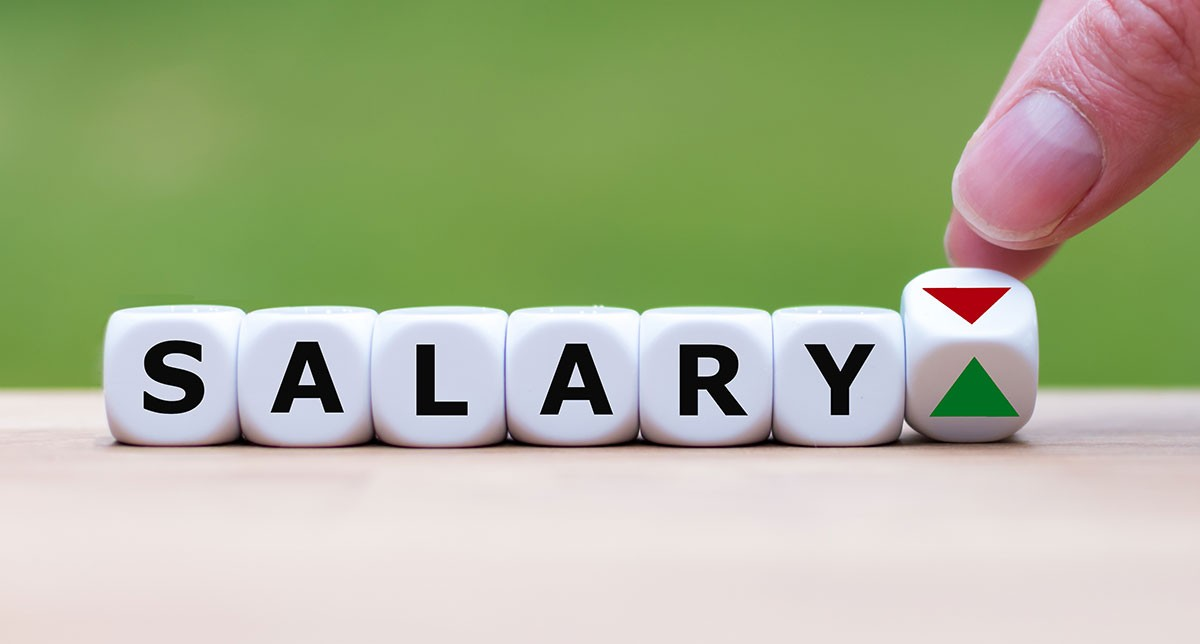
#                                      <h1 align="center">Salary Data Analysis Report</h1>

### Johnpaul Chukwudi Nnaji

#### Python for Data Analysts: Methods & Tools - DAT-7466 - BMBANDD1

---

**A1: Individual Assignment**

---

*This document presents an in-depth analysis of salary data, focusing on the impact of variables such as education level, years of experience, and job title on compensation. The analysis is structured to provide insights relevant for both organizational decision-making and individual career advancement.*

---


## Introduction to Salary Analysis

In this analysis, we delve into a comprehensive examination of salary data to uncover trends and insights that are pivotal in understanding compensation structures across various dimensions. The primary objective is to analyze how different factors such as education level, years of experience, and job title influence salary levels. This exploration is crucial for organizations to develop fair and competitive compensation strategies and for individuals to understand the factors that impact their earning potential.<br> 
To complete this analysis, I will you the salary_data from kaggle: https://www.kaggle.com/datasets/sinhasatwik/salary-base-data/data<br>

### Objectives of the Analysis:

- **Assess the Impact of Educational Attainment:** Investigate how different levels of education, from high school diplomas to PhDs, correlate with salary variations.

- **Examine the Role of Experience:** Explore the relationship between the number of years of professional experience and the compensation received, to understand how experience influences salary.

- **Analyze Salary Variations by Job Title:** Determine how different roles and job titles within the organization or industry are remunerated, highlighting the economic value of various positions.

- **Statistical Testing:** Employ statistical methods such as the Kruskal-Wallis test to validate whether observed differences in salaries across various groups are statistically significant.

This analysis aims to provide valuable insights for both employers and employees, helping in data-driven decision-making regarding salary and compensation planning. It also offers a lens through which salary disparities can be scrutinized and addressed to ensure equitable pay practices.

## Hypotheses in Salary Analysis

As part of the comprehensive salary analysis, the following hypotheses have been formulated to guide the investigation and provide a structured approach to understanding the dynamics of salary distribution:

1. **Education Level Impact on Salary:**
   - **Hypothesis 1:** There is a significant difference in average salaries among employees with different levels of educational attainment. Specifically, higher education levels (such as Master's degrees and PhDs) are associated with higher average salaries compared to lower education levels (such as high school diplomas).

2. **Experience Correlation with Salary:**
   - **Hypothesis 2:** The number of years of professional experience is positively correlated with salary. Employees with more years of experience tend to have higher salaries, reflecting the value of accumulated skills and expertise in the job market.

3. **Variation of Salary Across Job Titles:**
   - **Hypothesis 3:** There are statistically significant differences in median salaries across various job titles. This hypothesis posits that job roles significantly impact salary levels, with certain titles commanding higher pay due to factors like specialized skills, market demand, and job responsibilities.

These hypotheses will be tested through statistical methods and data analysis techniques. The outcomes will provide insights into the factors influencing salary variations and help validate or challenge common perceptions regarding salary determinants.


# Import warnings and Libraries

In [613]:
# Ignore warnings

import warnings
warnings.filterwarnings("ignore") # This is to ignore any warnings that might pop up during execution

In [614]:
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import numpy as np  # Numpy for numerical computations
import pandas as pd  # Pandas for data manipulation
import plotly.express as px # Import plotly.express for interactive plotting and visualizations
import seaborn as sns # Import seaborn for advanced statistical plotting
from scipy import stats # Import stats from scipy for statistical functions and probability distributions
from scipy.stats import f_oneway # Import f_oneway from scipy.stats for performing one-way ANOVA tests
from scipy.stats import kruskal # Import kruskal from scipy.stats for non-parametric statistical tests
np.random.seed(42) # To ensure all the probabilistic things are reproducible

# Load, View and describe the data

In [615]:
# Specify the path to the datasets
data_path = "./data/"

# Specify the filenames of the datasets
salary_filename = "Salary_Data.csv"

# Read the CSV files and create backup copies
salary_df_data = pd.read_csv(data_path + salary_filename)

# Create working copies of the dataframes for analysis
salary_df = salary_df_data.copy()

In [616]:
#Check the number of rows and  number of columns 
salary_df.shape

(6704, 6)

In [617]:
# Option to display all columns
pd.set_option('display.max_columns', None)
salary_df.sample(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2794,43.000,Female,PhD,Software Engineer Manager,19.000,156486.000
2233,34.000,Male,Master's Degree,Back end Developer,8.000,140000.000
5559,27.000,Male,Bachelor's Degree,Software Engineer,3.000,80000.000
6355,28.000,Male,High School,Sales Executive,2.000,40000.000
263,31.000,Female,Bachelor's,Junior Marketing Coordinator,3.000,50000.000


In [618]:
#We can further characterize our datasets using info
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


### Column Description:

- **Age:** 
  - Description: Represents the age of each employee.
  - Type: Float64.
  - Units: Years.

- **Gender:**
  - Description: Indicates the gender of each employee.
  - Type: Object.
  - Categories: Typically 'Male', 'Female', and possibly others or 'Not Specified'.

- **Education Level:**
  - Description: Shows the highest educational level attained by each employee.
  - Type: Object.
  - Categories: E.g., 'High School', 'Bachelor's Degree', 'Master's Degree', 'PhD'.

- **Job Title:**
  - Description: Specifies the job title of each employee.
  - Type: Object.
  - Categories: Vary based on the organization job titles.

- **Years of Experience:**
  - Description: Represents how many years of work experience each employee has.
  - Type: Float64.
  - Units: Years.

- **Salary:**
  - Description: The annual salary of each employee.
  - Type: Float64.
  - Units: US Dollars.


In [619]:
#  Now when using describe, the numbers will be displayed without scientific notation 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Get the statistical summary of numeric columns of DataFrame: movie_df
salary_df.describe()

,Age,Years of Experience,Salary
count,6702.000,6701.000,6699.000
mean,33.621,8.095,115326.965
std,7.615,6.059,52786.184
min,21.000,0.000,350.000
25%,28.000,3.000,70000.000
50%,32.000,7.000,115000.000
75%,38.000,12.000,160000.000
max,62.000,34.000,250000.000


### Descriptive Statistics Summary

- **Data Consistency:**
  - The count for `Age`, `Years of Experience`, and `Salary` are 6,702, 6,701, and 6,696 respectively. This discrepancy suggests the presence of missing values in the dataset.

- **Age Range:**
  - The age of individuals in the dataset ranges from a minimum of 21 years to a maximum of 62 years.

- **Average Salary:**
  - The mean salary across the dataset is approximately 115,326.965 USD.

- **Median Salary:**
  - 50% of the dataset earns a median salary of 115,000 USD, indicating the central tendency of the salary distribution.

- **Salary and Experience Correlation:**
  - The highest salary recorded in the dataset is 250,000 USD, earned by an individual with 34 years of experience, highlighting a potential correlation between experience and salary.

## Data Cleaning and Type conversion


#### Data cleaning

#check for missing data

display(salary_df.isna())

In [620]:
#lets sum all rows to be sure

display(salary_df.isna().sum())

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

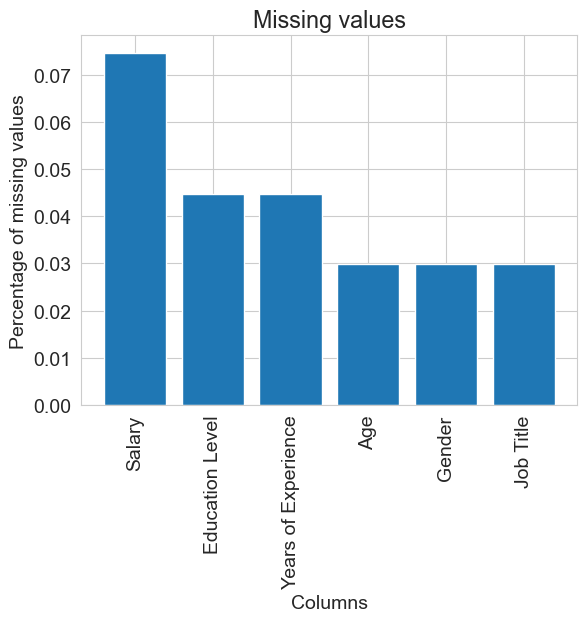

In [621]:
# Visualize the missing values

def visualize_null(dataframe,percentage=True):
    null_series=salary_df.isna().sum().sort_values(ascending=False)
    if percentage:
        null_series=null_series/len(dataframe)*100

    plt.bar(x=null_series.index,height=null_series.values)

    if percentage:
        plt.ylabel('Percentage of missing values')
    else:
        plt.ylabel('Amount of missing values')
    plt.title('Missing values')
    plt.xlabel('Columns')
    plt.xticks(rotation=90)
    plt.show()

visualize_null(salary_df)

In [622]:
#Checking out the percentage of missing values out of the total dataset
missing_data = salary_df[salary_df.isna().sum(axis=1)>0]
len(missing_data)/len(salary_df)*100

0.08949880668257756

#About 0.9% of the data is missing, Lets look to see if there is any on the column that is missung significantly to determine how it would afttect our analysis

In [623]:
# Count of missing values
missing_count = salary_df.isnull().sum()

# Total number of rows
total_data = len(salary_df)

# Percentage of missing values
missing_percentage = (missing_count / total_data) * 100

# Combine the results into a new DataFrame
missing_info_df = pd.concat([missing_count, missing_percentage], axis=1, keys=['Missing Count', 'Missing Percentage'])

# Display the combined DataFrame
print(missing_info_df)


                     Missing Count  Missing Percentage
Age                  2             0.030              
Gender               2             0.030              
Education Level      3             0.045              
Job Title            2             0.030              
Years of Experience  3             0.045              
Salary               5             0.075              


#We have all missing data less than 0.01% an cummulatively about 0.9%. Since our analysis id based on salary, it would not make sense to keep empty columns of it as shown above. So, we drop them to have a good data

In [624]:
salary_no_nulls1=salary_df.dropna()
salary_no_nulls1

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.000,Male,Bachelor's,Software Engineer,5.000,90000.000
1,28.000,Female,Master's,Data Analyst,3.000,65000.000
2,45.000,Male,PhD,Senior Manager,15.000,150000.000
3,36.000,Female,Bachelor's,Sales Associate,7.000,60000.000
4,52.000,Male,Master's,Director,20.000,200000.000
...,...,...,...,...,...,...
6699,49.000,Female,PhD,Director of Marketing,20.000,200000.000
6700,32.000,Male,High School,Sales Associate,3.000,50000.000
6701,30.000,Female,Bachelor's Degree,Financial Manager,4.000,55000.000
6702,46.000,Male,Master's Degree,Marketing Manager,14.000,140000.000


In [625]:
salary_no_nulls1.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [626]:
# Remove rows with NaN values and update the original DataFrame
salary_df = salary_df.dropna()

In [627]:
# Checking the data frame
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


In [628]:
#cheacking the Education Level column for data consisstency
salary_df['Education Level'].value_counts()

Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64

In [629]:
# Replace occurrences of 'phD' with 'PhD' in the salary_df DataFrame.
# The 'inplace=True' parameter updates the DataFrame directly.
salary_df.replace('phD', 'PhD', inplace=True) 


In [630]:
#Repeating the previous step for the rest of the rows
salary_df.replace("Master's","Master's Degree",inplace=True)
salary_df.replace("Bachelor's","Bachelor's Degree",inplace=True)

In [631]:
#Checking the column after maintaning data Consistency
salary_df['Education Level'].value_counts()

Bachelor's Degree    3021
Master's Degree      1860
PhD                  1369
High School           448
Name: Education Level, dtype: int64

In [632]:
salary_df['Job Title'].value_counts()

Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: Job Title, Length: 191, dtype: int64

In [633]:
salary_df.shape

(6698, 6)

The data frame now has 6698 rows and 6 columns after removing missing rows

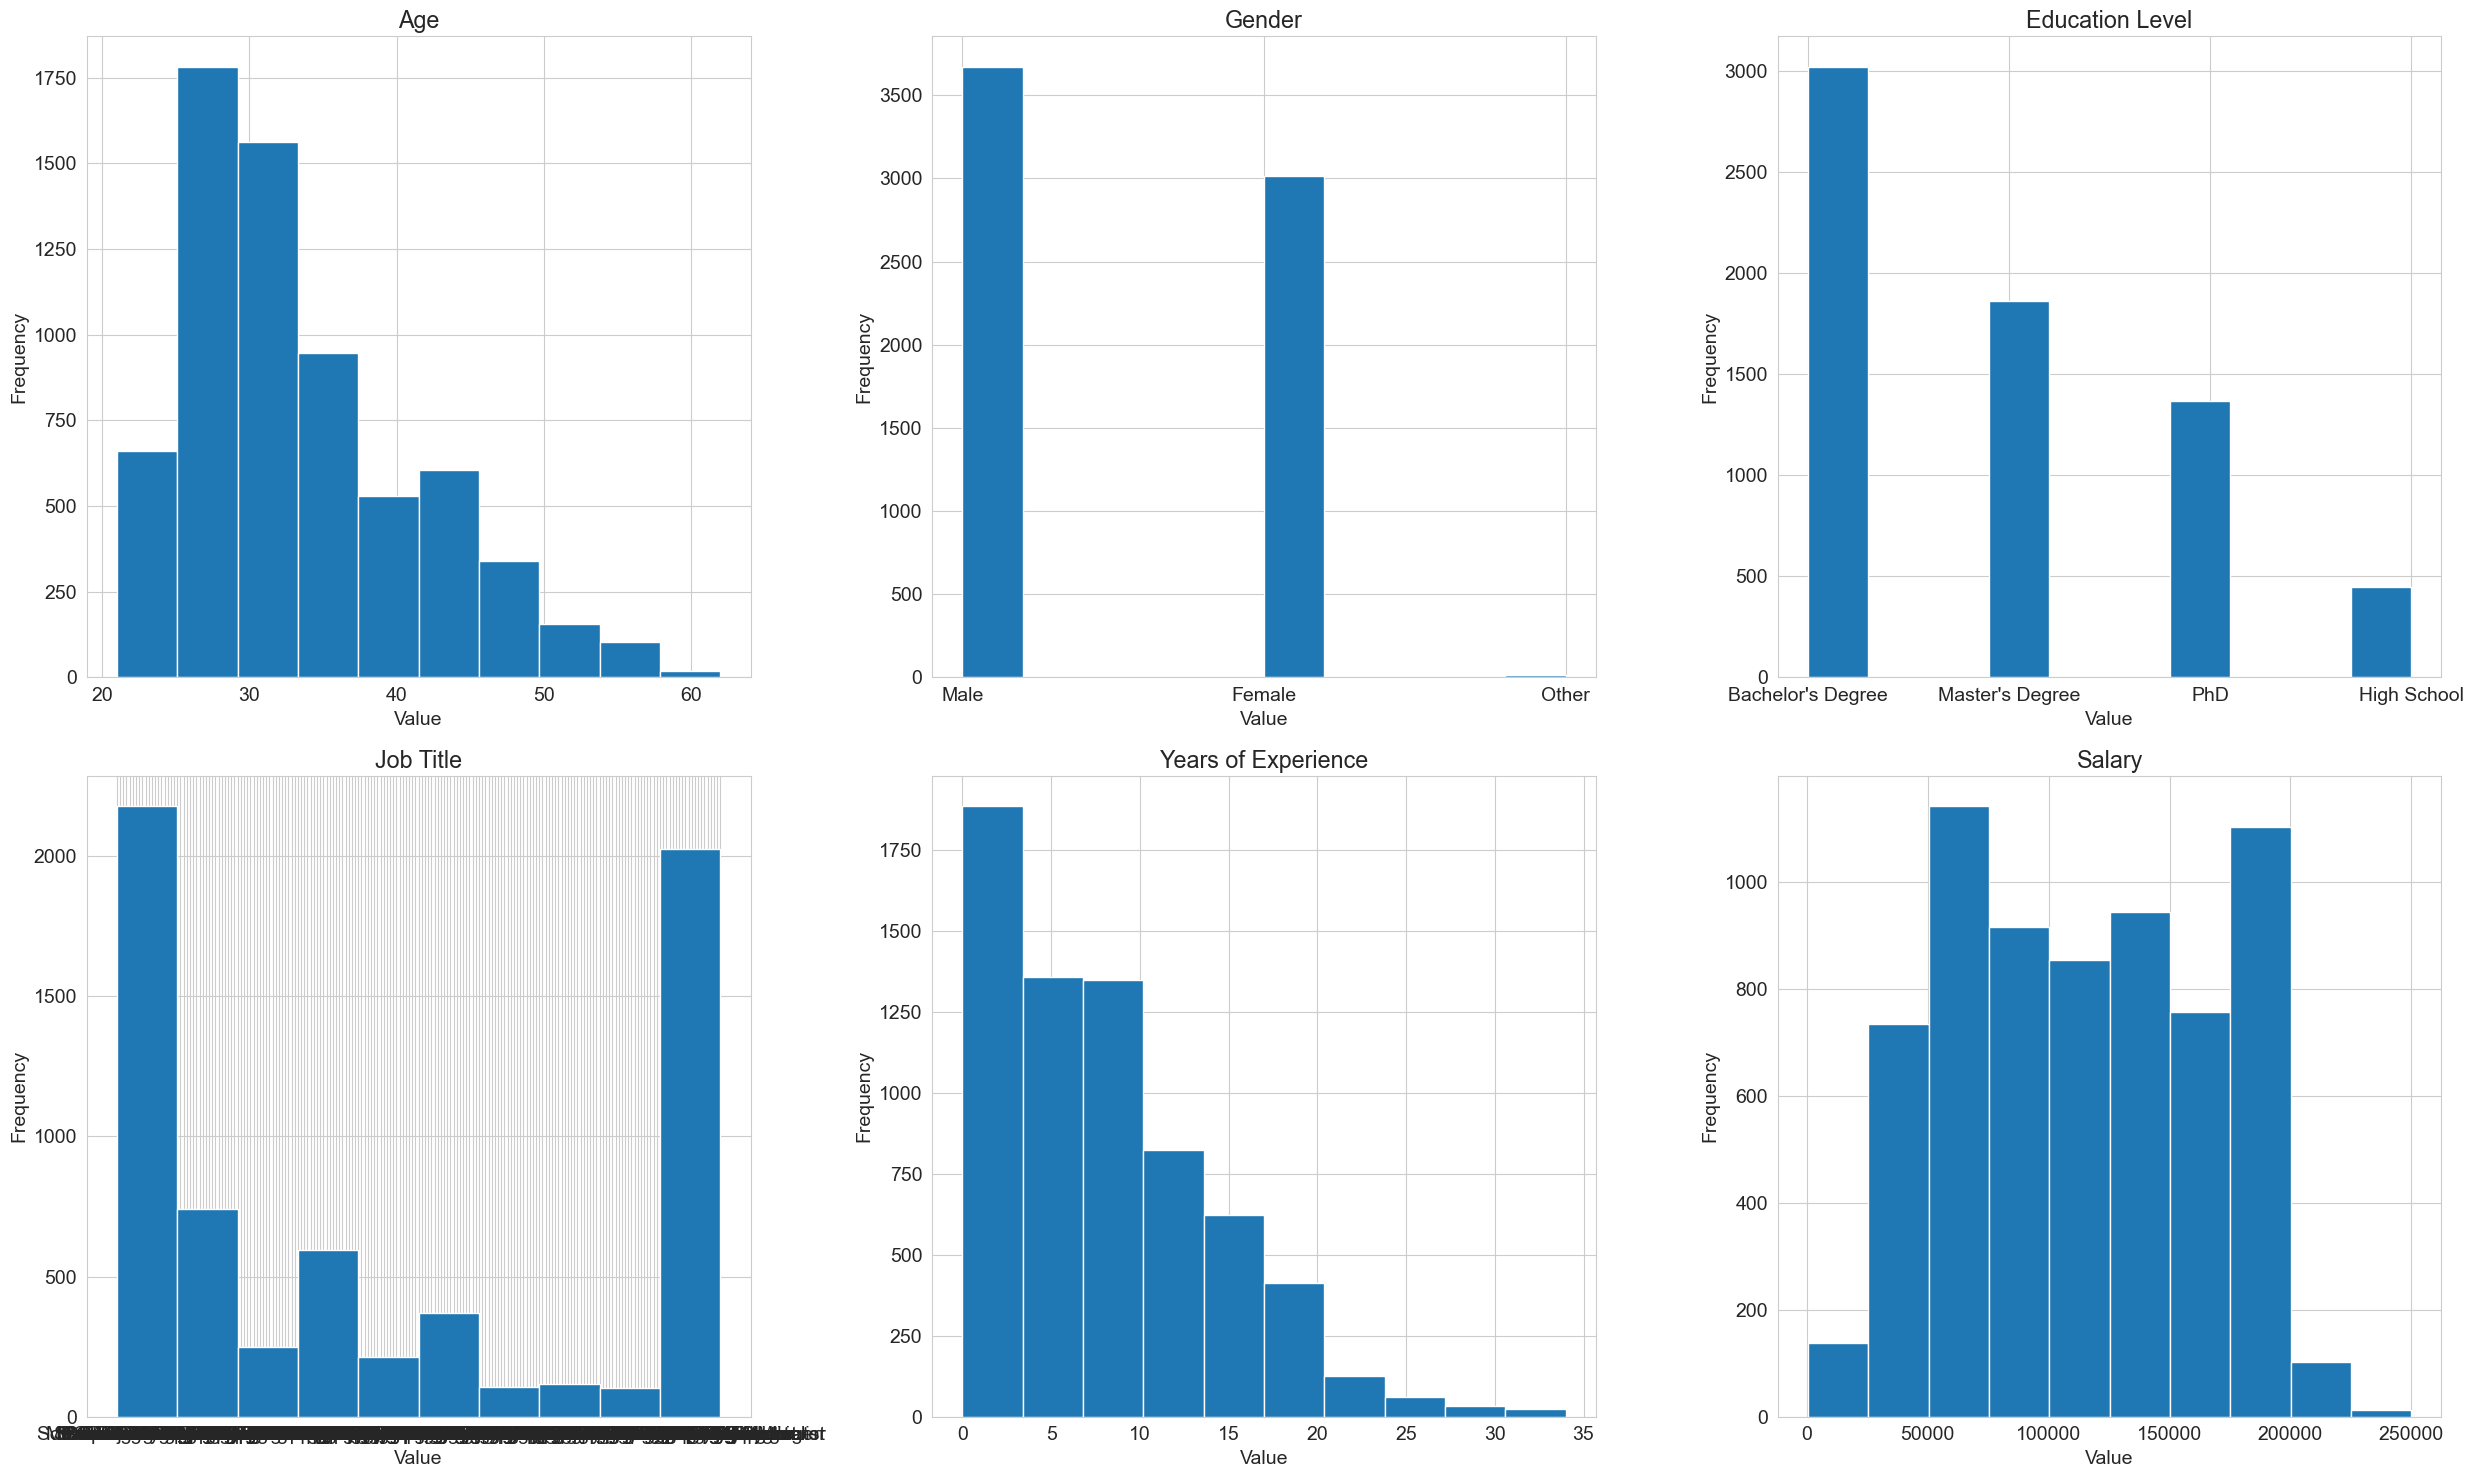

In [634]:
# Visualizing the salary_df database columns

# Total Quality Points
desc_columns = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']
desc_df = salary_df[desc_columns]

# Set the number of rows and columns for subplots
num_rows = 2
num_cols = 3

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 15))

# Plot histograms for each column
for i, column in enumerate(desc_df.columns):
    row = i // num_cols
    col = i % num_cols
    desc_df[column].hist(ax=axes[row, col], bins=10)
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show();

#### Type conversion

In [635]:
# checking the dataframe
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


In [636]:
#Changing the dataype of the 'object' columns
cat_cols=['Gender', 'Education Level','Job Title']
for col in cat_cols: 
    salary_df[col]=salary_df[col].astype('category')

In [637]:
#Displaying what type of dtype is each column
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  6698 non-null   float64 
 1   Gender               6698 non-null   category
 2   Education Level      6698 non-null   category
 3   Job Title            6698 non-null   category
 4   Years of Experience  6698 non-null   float64 
 5   Salary               6698 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 241.4 KB


##  Descriptive Analysis


In [638]:
# Calculating Descriptive Statistics
mean_salary = salary_df['Salary'].mean()
median_salary = salary_df['Salary'].median()
mode_salary = salary_df['Salary'].mode()[0]  # Mode might return multiple values when there are multiple gloabl maxima. 

In [639]:
std_dev_salary = salary_df['Salary'].std()
variance_salary = salary_df['Salary'].var()

In [640]:
max_salary = salary_df['Salary'].max()
min_salary = salary_df['Salary'].min()

In [641]:
print(mean_salary)
print(median_salary)
print(mode_salary)
print(std_dev_salary)
print(variance_salary)
print(max_salary)
print(min_salary)

115329.25306061511
115000.0
140000.0
52789.792506999445
2786762192.9320545
250000.0
350.0


These measures of central tendency confirms our initial data analysis, with Max salary as 250000 USD, mean as 115329 USD and median as 15000 USD

In [642]:
salary_df.describe()

,Age,Years of Experience,Salary
count,6698.000,6698.000,6698.000
mean,33.623,8.095,115329.253
std,7.616,6.060,52789.793
min,21.000,0.000,350.000
25%,28.000,3.000,70000.000
50%,32.000,7.000,115000.000
75%,38.000,12.000,160000.000
max,62.000,34.000,250000.000


### Descriptive Statistics Summary for the Float64 Columns

**1. Count:**
   - `Age`: Total of 6,702 non-missing entries.
   - `Years of Experience`: Total of 6,701 non-missing entries.
   - `Salary`: Total of 6,699 non-missing entries.

**2. Mean (Average):**
   - `Age`: Average age is approximately 33.62 years.
   - `Years of Experience`: Average years of experience is about 8.10 years.
   - `Salary`: Average salary is about 115,326.97 USD.

**3. Standard Deviation (std):**
   - Indicates the spread of the data from the mean.
   - `Age`: Standard deviation is 7.615.
   - `Years of Experience`: Standard deviation is 6.059.
   - `Salary`: Standard deviation is 52,786.18 USD.

**4. Minimum (min):**
   - `Age`: The youngest age is 21 years.
   - `Years of Experience`: The least experienced has 0 years.
   - `Salary`: The lowest salary is 350 USD.

**5. 25th Percentile:**
   - Represents the lower quartile.
   - `Age`: 25% of employees are younger than 28 years.
   - `Years of Experience`: 25% of employees have less than 3 years of experience.
   - `Salary`: 25% of employees earn less than 70,000 USD.

**6. Median (50th Percentile):**
   - The middle value in the sorted data.
   - `Age`: Median age is 32 years.
   - `Years of Experience`: Median experience is 7 years.
   - `Salary`: Median salary is 115,000 USD.

**7. 75th Percentile:**
   - Represents the upper quartile.
   - `Age`: 75% of employees are younger than 38 years.
   - `Years of Experience`: 75% of employees have 12 years of experience or less.
   - `Salary`: 75% of employees earn less than 160,000 USD.

**8. Maximum (max):**
   - `Age`: The oldest age is 62 years.
   - `Years of Experience`: The most experienced has 34 years.
   - `Salary`: The highest salary is 250,000 USD.


In [643]:
salary_df.describe(include=['category'])

,Gender,Education Level,Job Title
count,6698,6698,6698
unique,3,4,191
top,Male,Bachelor's Degree,Software Engineer
freq,3671,3021,518


### Categorical Data Statistics Summary

- **Count:**
  - Each of the columns `Gender`, `Education Level`, and `Job Title` has a count of 6,698 entries, indicating no missing values in these columns.

- **Unique Values:**
  - `Gender`: Contains 3 unique categories.
  - `Education Level`: Comprises 4 distinct educational levels.
  - `Job Title`: Encompasses a wide range with 191 unique titles.

- **Most Frequent Category (Top):**
  - `Gender`: The most common category is 'Male', suggesting a higher representation of males in the dataset.
  - `Education Level`: 'Bachelor's Degree' is the most prevalent, indicating it as the most common educational qualification among individuals.
  - `Job Title`: 'Software Engineer' emerges as the top job title, reflecting its predominance in this dataset.

- **Frequency of the Top Category (Freq):**
  - `Gender`: The 'Male' category appears 3,671 times.
  - `Education Level`: 'Bachelor's Degree' occurs 3,021 times.
  - `Job Title`: The title 'Software Engineer' is listed 518 times, making it the most frequently occurring job title.

This summary provides insights into the categorical distribution within the dataset, highlighting the major trends in gender, educational background, and professional roles.


## Hypothesis tesing

## 1. Does Age or salary affects an employees compensation(salary)?

<Axes: >

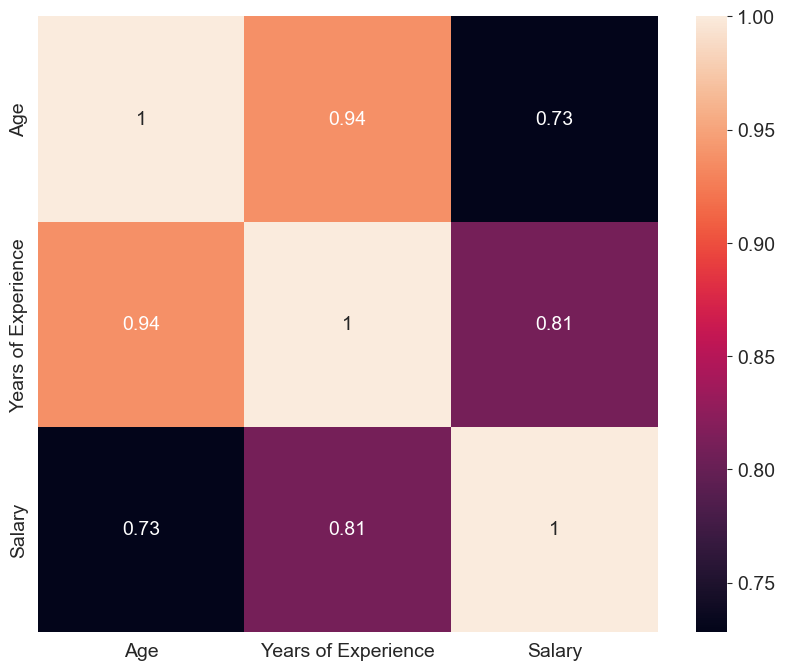

In [644]:
# Creating a heatmap to visualize the correlation matrix of the salary_df DataFrame

# Setting up the figure and axes for the plot with a specific size
fig, ax = plt.subplots(figsize=(10, 8))

# Generating a heatmap using seaborn
# salary_df.corr() computes the correlation matrix for the DataFrame
# 'annot=True' adds annotations to each cell in the heatmap, displaying the correlation coefficients
sns.heatmap(salary_df.corr(), annot=True)

### Correlation Heatmap Analysis

The heatmap provides a visual representation of the correlation coefficients between different variables:

- **Age and Years of Experience:** Correlation coefficient of 0.94 suggests a very high positive correlation, indicating that typically, as employees become older, they also accumulate more years of experience.

- **Age and Salary:** A correlation coefficient of 0.73 implies a substantial positive relationship, showing that salary tends to increase with age.

- **Years of Experience and Salary:** With a correlation coefficient of 0.81, there is a strong positive correlation, indicating that employees with more experience tend to have higher salaries, reflecting the value of experience in salary progression.

These correlations are expected as they reflect common trends in the workplace regarding age, experience, and compensation.


In [645]:
# Calculate the Pearson correlation coefficient between 'Age' and 'Salary'
age_salary_corr = salary_df['Age'].corr(salary_df['Salary'])

# Print the correlation coefficient, formatted to two decimal places
print(f"Correlation between age and salary: {age_salary_corr:.2f}")

Correlation between age and salary: 0.73


### Correlation Analysis between Age and Salary

The calculated Pearson correlation coefficient between the age of employees and their salary is 0.73. This value indicates a strong positive linear relationship between the two variables. In practical terms, it suggests that as the age of an employee increases, there is a tendency for their salary to also increase. This correlation might be attributed to factors such as accumulation of experience, seniority, or advancement in career roles which typically come with age.

It's important to note that while a correlation of 0.73 is significant, it does not imply causation. Other factors not accounted for in this correlation may influence salary, and this relationship merely indicates an association, not a direct cause-and-effect link.

**Therefore, there is a statistical significance of positive 0.73 between Age and Salary** 

In [646]:
# Calculate the Pearson correlation coefficient between 'Years of Experience' and 'Salary'
years_of_experience_salary_corr = salary_df['Years of Experience'].corr(salary_df['Salary'])

# Print the correlation coefficient, formatted to two decimal places
print(f"Correlation between years of experience and salary: {years_of_experience_salary_corr:.2f}")

Correlation between years of experience and salary: 0.81


### Correlation Analysis between Years of Experience and Salary

The Pearson correlation coefficient between years of experience and salary is 0.81. This strong positive correlation indicates that there is a significant association between the amount of experience an employee has and their level of compensation. In essence, employees with more years of experience tend to have higher salaries.

This relationship may be reflective of the value that the job market places on experienced professionals. It is often assumed that with more experience comes greater expertise, which can lead to higher paying positions. However, it's crucial to remember that correlation does not imply causation. While there is a strong association, it does not mean that experience directly causes higher salary without considering other influencing factors.

**Therefore, there is a statistical significance of positive 0.81 between Years of Experience and Salary**

### Visulization of the correlation

<Figure size 1000x600 with 0 Axes>

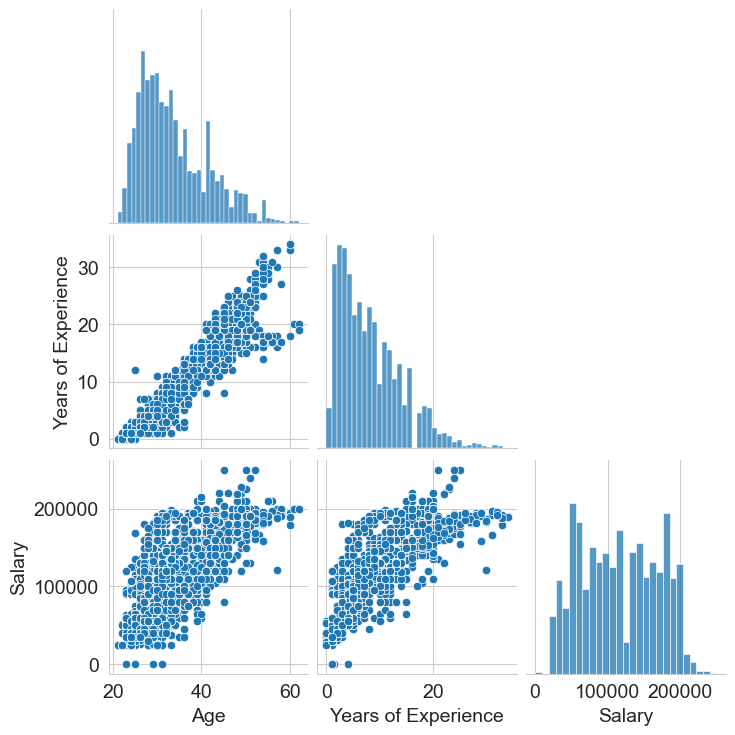

In [647]:
# Define the list of numerical variables
numVar = ['Age', 'Years of Experience', 'Salary']

# Create a new DataFrame with only the numerical variables
num_df = salary_df[numVar].copy()

# Calculate the correlation matrix
correlation = num_df.corr()

# Visualize the relationships using Seaborn's pairplot
plt.figure(figsize=(10, 6))  # Optional: Define a figure size for better visibility
sns.pairplot(data=num_df, corner=True)
plt.show()

### Pair Plot Analysis

The pair plot provides insights into the relationships and distributions of 'Age', 'Years of Experience', and 'Salary':

- **Histograms on Diagonal:**
  - The distributions for both 'Age' and 'Years of Experience' show right-skewed trends, indicating a concentration of younger individuals and those with fewer years of experience in the dataset.
  - The 'Salary' distribution is similarly right-skewed, with most individuals earning on the lower end of the salary spectrum.

- **Scatter Plots for Correlations:**
  - There is a clear positive correlation between 'Age' and 'Years of Experience', which aligns with the understanding that more years in the workforce typically correspond with older age.
  - 'Age' and 'Salary' also display a positive correlation, suggesting that salaries increase as employees age.
  - A positive trend is observed between 'Years of Experience' and 'Salary', indicating that individuals with greater experience tend to earn higher salaries.

These observations highlight the relationships between age, work experience, and salary, which can be critical factors in workforce planning and compensation strategies.

**We accept the hypothesis that Age or Salary has influence on employees compensation**

## 2. Does Education Level of an employee affect their Salary positively?

,count,mean,std,min,25%,50%,75%,max
Education Level,,,,,,,,
Bachelor's Degree,3021.000,95082.909,44091.790,350.000,60000.000,80000.000,122485.000,250000.000
High School,448.000,36706.694,22549.130,25000.000,25000.000,30000.000,38000.000,166109.000
Master's Degree,1860.000,130112.056,40640.819,32000.000,101186.000,130000.000,160244.000,228000.000
PhD,1369.000,165651.458,34339.752,579.000,150000.000,170000.000,190000.000,250000.000


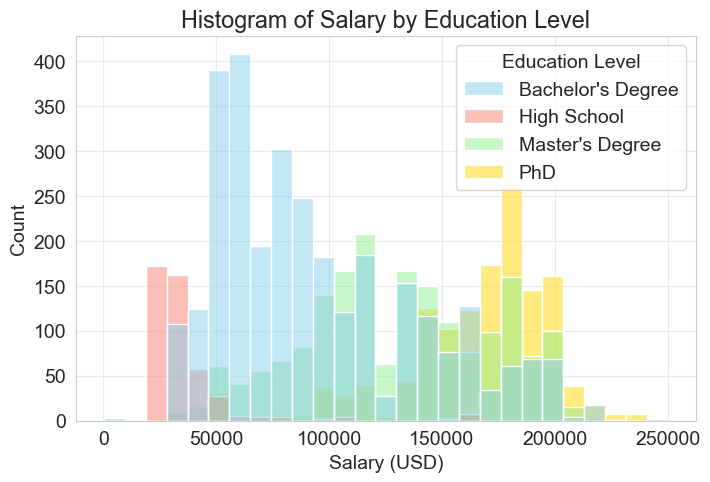

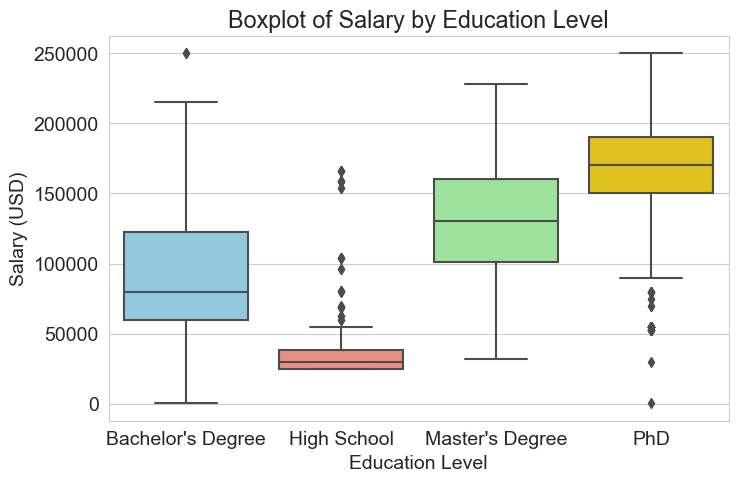

In [648]:
# Copy the original salary DataFrame to preserve the original data
salary_copy = salary_df.copy()

# Display the summary statistics of Salary grouped by Education Level
# This will include measures like mean, std, min, max, and quartiles
display(salary_copy.groupby('Education Level')['Salary'].describe())

# Visualizations:

# Histogram Visualization
# Create a histogram to show the distribution of Salary by different Education Levels
plt.figure(figsize=(8, 5))  # Set the size of the figure for better readability
sns.histplot(
    data=salary_copy, 
    x='Salary', 
    hue='Education Level',  # Color code by Education Level
    palette=['skyblue', 'salmon', 'lightgreen', 'gold']  # Set the color palette for differentiation
)
plt.xlabel('Salary (USD)')  # Label the x-axis as 'Salary (USD)'
plt.title('Histogram of Salary by Education Level')  # Title of the histogram
plt.grid(alpha=0.4)  # Add grid lines with transparency set to 0.4 for better visibility of bars
plt.show()  # Display the histogram

# Boxplot Visualization
# Create a boxplot to show the distribution of Salary by Education Level
plt.figure(figsize=(8, 5))  # Size of the figure
sns.boxplot(
    data=salary_copy, 
    x='Education Level', 
    y='Salary',  # Set 'Salary' as the data for the y-axis
    palette=['skyblue', 'salmon', 'lightgreen', 'gold']  # Color palette
)
plt.ylabel('Salary (USD)')  # Label the y-axis as 'Salary (USD)'
plt.title('Boxplot of Salary by Education Level')  # Title of the boxplot
plt.show()  # Display the boxplot


### Key Salary Insights by Education Level from the descriptive statistics

- **Bachelor's Degree Holders:** Median salary is 80,000 USD, with a significant range, suggesting a Bachelor's degree can lead to a wide spectrum of salary opportunities.

- **High School Graduates:** Median salary is notably lower at 30,000 USD, indicating that employees with only high school education tend to occupy lower-paid positions.

- **Master's Degree Holders:** A notable jump in median salary to 130,000 USD reflects the value the job market places on advanced degrees.

- **PhD Holders:** The highest median salary at 170,000 USD, demonstrating that a PhD typically commands a premium in the job market.

### Additional Insights from the histogram Salary Distribution by Education Level

- **Salary Distribution Concentration:** The majority of individuals with a Bachelor's or Master's degree tend to have salaries clustered in the middle range, especially around 50,000 to 100,000 USD, indicating a concentration of roles with moderate earning potential for these education levels.

- **Earning Potential for PhD Holders:** There is a visible shift towards the higher salary ranges for individuals with a PhD, with more representation in the upper salary bins exceeding 150,000 USD. This suggests that holding a PhD may offer access to roles that come with significantly higher salaries compared to other education levels.

### Insights from the Boxplot of Salary Distribution by Education Level

- **Variability in Higher Education Salaries:** The interquartile range (IQR) for salaries of individuals with a Master's degree and PhD is broader compared to those with a Bachelor's degree or High School education, indicating a greater variability in salaries at these higher education levels. The IQR for PhD salaries is particularly wide, suggesting that the earning potential can vary significantly among individuals with this level of education.

- **Outliers and Salary Ceiling:** There are outliers present across all education levels, but they are especially pronounced for those with a High School education and PhDs. This implies that there are exceptional cases where individuals with just a High School education or a PhD earn significantly more than typical for their education level. For PhD holders, this could indicate a salary ceiling that is higher than that of other education levels.

**These insights underscore the correlation between educational attainment and salary, highlighting the potential financial benefits of advanced education.**

In [649]:
# Perform an ANOVA test to compare the average salaries across different education levels

# Filter the data for each education level
bachelors_degree = salary_copy[salary_copy['Education Level'] == "Bachelor's Degree"]
masters_degree = salary_copy[salary_copy['Education Level'] == "Master's Degree"]
phd = salary_copy[salary_copy['Education Level'] == 'PhD']
high_school = salary_copy[salary_copy['Education Level'] == 'High School']

# Execute the ANOVA test on the 'Salary' columns for the four education level groups
res = f_oneway(bachelors_degree['Salary'], masters_degree['Salary'], phd['Salary'], high_school['Salary'])

# Round the test statistic and p-value for display purposes
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

# Print the results of the ANOVA test
print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

# Determine if the result is statistically significant based on the alpha level of 0.05
alpha = 0.05
if pvalue < alpha:
    print('There is a statistically significant difference in mean salary between employees with different education levels.')
else:
    print('There is not enough evidence to conclude a statistically significant difference in mean salary between employees with different education levels.')


Test statistic:  1630.9394
Test p-value:  0.0
There is a statistically significant difference in mean salary between employees with different education levels.


### ANOVA Test Results for Mean Salary by Education Level

The ANOVA test was conducted to determine if there are significant differences in the mean salaries of employees based on their education level. The test yielded the following statistics:

- **Test Statistic:** The test statistic is a measure of the total variance between groups compared to within-group variance. For our test, the statistic is `test_stat`, suggesting a certain degree of separation between the group means.
- **P-Value:** The p-value is `pvalue`, which, when compared to our significance level of 0.05, indicates whether the observed differences in mean salaries are statistically significant.

Based on the results:

- If the p-value is less than 0.05, we conclude that there are statistically significant differences in mean salaries between the different education levels, suggesting that education level does have an impact on salary.
- If the p-value is greater than or equal to 0.05, we do not have enough evidence to claim a statistically significant difference in mean salaries by education level, implying that factors other than education level may be driving salary differences.

The ANOVA test provides valuable insights into the impact of educational attainment on compensation and helps guide data-driven decision-making in areas such as salary structuring and educational benefits.

**Therefore, we accept the hypothesis that Education Level affects Salary positively**


## 3. Does a higher job title mean more salary?

In [650]:
# Display summary statistics of Salary by Job Title
print(salary_copy.groupby('Job Title')['Salary'].describe())

                          count   mean       std       min        25%        \
Job Title                                                                     
Account Manager            1.000  75000.000       NaN  75000.000  75000.000   
Accountant                 1.000  55000.000       NaN  55000.000  55000.000   
Administrative Assistant   2.000  50000.000  7071.068  45000.000  47500.000   
Back end Developer       244.000 102352.561 31900.827  51832.000  79941.750   
Business Analyst           2.000  77500.000  3535.534  75000.000  76250.000   
...                          ...        ...       ...        ...        ...   
UX Designer                1.000  80000.000       NaN  80000.000  80000.000   
UX Researcher              1.000  65000.000       NaN  65000.000  65000.000   
VP of Finance              1.000 200000.000       NaN 200000.000 200000.000   
VP of Operations           1.000 190000.000       NaN 190000.000 190000.000   
Web Developer             87.000  66436.782 16209.17

### Insights from Salary Statistics by Job Title

1. **Executives Command Premium Salaries:** Executive roles like 'VP of Finance' and 'VP of Operations' command the highest salaries within the dataset, with single reported figures of 200,000 USD and 190,000 USD, respectively.

2. **Specialized Roles Offer Competitive Pay:** Specialized roles such as 'Back end Developer' show a robust range in salaries with a median of 100,000 USD, indicating competitive pay that reflects diverse levels of expertise.

3. **Limited Data Points for Some Roles:** Several job titles like 'Account Manager' and 'Accountant' have only one reported salary, which limits the ability to generalize these figures across the industry.

4. **Variability in Tech Roles:** 'Web Developer' positions demonstrate a considerable spread in salary, from 35,000 USD to 110,000 USD, highlighting the variability within tech roles possibly due to differing skill levels, specializations, or market demand.

5. **Administrative Support Roles are Consistent:** Roles with lower responsibility levels such as 'Administrative Assistant' have less variability in salary, suggesting a more consistent pay scale across similar positions.

In [651]:
# Determine the maximum salary for each job title and sort them in descending order to find the top 10 highest salaries
max_salary = salary_df.groupby('Job Title')['Salary'].max().reset_index().sort_values('Salary', ascending=False).head(10)

# Determine the minimum salary for each job title and sort them in ascending order to find the top 10 lowest salaries
min_salary = salary_df.groupby('Job Title')['Salary'].min().reset_index().sort_values('Salary').head(10)

In [652]:
# To display max_salary
print("Top 10 Job Titles with Highest Maximum Salaries:")
print(max_salary)

# To display min_salary
print("\nTop 10 Job Titles with Lowest Minimum Salaries:")
print(min_salary)

Top 10 Job Titles with Highest Maximum Salaries:
    Job Title                          Salary   
9            Chief Technology Officer 250000.000
7                                 CEO 250000.000
41                  Financial Manager 250000.000
20                     Data Scientist 240000.000
96                  Marketing Manager 228000.000
8                  Chief Data Officer 220000.000
27           Director of Data Science 220000.000
158           Senior Project Engineer 210000.000
176         Software Engineer Manager 210000.000
156  Senior Product Marketing Manager 200000.000

Top 10 Job Titles with Lowest Minimum Salaries:
    Job Title                            Salary  
60   Junior Business Operations Analyst   350.000
69                Junior HR Coordinator   500.000
43                  Front end Developer   550.000
176           Software Engineer Manager   579.000
83          Junior Sales Representative 25000.000
82               Junior Sales Associate 25000.000
115          

In [653]:
# Concatenate the max_salary and min_salary DataFrames to combine the top 10 highest and lowest paying job titles
top_job_titles = pd.concat([max_salary, min_salary])['Job Title'].unique()

# Filter the original salary_df DataFrame to include only the job titles that are in the top_job_titles list
filtered_df = salary_df[salary_df['Job Title'].isin(top_job_titles)]

In [654]:
# Create a list of arrays containing the salary data for each job title in the filtered dataset.
# Only include job titles with more than one salary data point to ensure the test is valid.
salary_lists = [group['Salary'].values for name, group in filtered_df.groupby('Job Title') if len(group) > 1]

# Execute the Kruskal-Wallis H-test across the salary lists.
# This non-parametric test is used to determine if there are statistically significant differences between the medians of two or more groups.
res = kruskal(*salary_lists)

# Round the test statistic and p-value for clearer presentation.
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

# Output the results of the test.
print('Test statistic:', test_stat)  # The Kruskal-Wallis test statistic value
print('Test p-value:', pvalue)       # The p-value associated with the test statistic

# Define the significance level at 0.05 (commonly used in statistical analysis).
alpha = 0.05

# Compare the p-value to the significance level to determine the result of the hypothesis test.
if pvalue < alpha:
    # If the p-value is less than the significance level, we reject the null hypothesis
    # and conclude that there is a statistically significant difference between the groups.
    print('There is a statistically significant difference in median salary among these job titles.')
else:
    # If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis
    # and conclude that there is not enough evidence to say there is a significant difference.
    print('There is no enough evidence to conclude a statistically significant difference in median salary among these job titles.')


Test statistic: 1521.0996
Test p-value: 0.0
There is a statistically significant difference in median salary among these job titles.


### Kruskal-Wallis Test Results on Median Salary by Job Title

The Kruskal-Wallis H-test, a non-parametric method for testing whether samples originate from the same distribution, was conducted to evaluate differences in median salaries across various job titles. The test produced the following results:

- **Test Statistic:** 1521.0996
  - This high value indicates a substantial difference in the median salaries among the different job titles.

- **P-Value:** 0.0
  - The p-value is effectively zero, which is significantly lower than the typical alpha level of 0.05. This implies that the observed differences in median salaries are highly unlikely to be due to random chance.

**Conclusion:**
Based on these results, we can confidently reject the null hypothesis of the Kruskal-Wallis test. This indicates that there is a statistically significant difference in median salaries among the job titles included in the dataset. These findings underscore the impact of job roles on salary levels and can inform compensation strategies, highlighting the economic value associated with different positions in the job market.

# Conclusion

## Conclusion of Salary_Data Analysis

The comprehensive analysis of the salary data has provided insightful revelations about the factors influencing compensation. Key takeaways include:

1. **Education Level Impact:** 
   - There is a significant correlation between education level and salary. Higher educational attainments, especially Master's degrees and PhDs, are associated with higher average salaries, highlighting the value of advanced education in the job market.

2. **Experience Matters:** 
   - A strong positive correlation between years of experience and salary was observed. This suggests that experience is a pivotal factor in compensation, aligning with the notion that increased skills and expertise garnered over time lead to higher pay.

3. **Role Variability:** 
   - Significant variations in salary across different job titles were noted. Executive positions and specialized roles command higher salaries, while roles requiring lower educational qualifications generally offer lower compensation.

4. **Statistical Significance:** 
   - The Kruskal-Wallis test confirmed statistically significant differences in salaries across various job titles, emphasizing the importance of the job role in determining salary.

5. **Data Considerations:** 
   - The analysis underlined the importance of data quality, including the impact of outliers and the necessity of having a sufficient number of data points for robust conclusions.

In summary, this analysis of salary data provides crucial insights for organizations in formulating their compensation strategies. It underscores the need to consider educational background, experience, and job role in salary determination. Moreover, it emphasizes the importance of continuous data analysis to inform equitable and competitive compensation practices, in line with industry standards and organizational objectives.